# Pepper customers data analysis

## Logistic Regression

In [13]:
# Load modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA



In [14]:
# Load dataset
df = pd.read_pickle("data/df.pkl")

df2 = pd.get_dummies(df, drop_first=True)
df2

,Age,Education,Income,Profile,p1,p2,p3,p4,p5,p6,Sex_Woman,Consumption_Yes
0,2,6,3,19,3,3,2,7,1,3,0,1
1,2,2,2,39,7,5,7,6,7,7,0,0
2,2,5,2,23,4,1,4,6,4,4,0,1
3,3,7,5,16,4,2,4,2,1,3,0,1
4,3,6,3,20,3,3,4,5,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2,6,5,24,7,1,7,1,1,7,1,1
132,2,6,1,13,2,1,3,5,1,1,1,0
133,3,6,3,21,4,2,4,6,3,2,1,1
134,2,6,2,13,1,2,1,4,1,4,1,0


In [15]:
X = df2[['Age', 'Education', 'Income', 'Profile', 'Sex_Woman']]
y = df2['Consumption_Yes']

# all parameters not specified are set to their defaults
model = LogisticRegression()

# Fit model
model.fit(X, y)

LogisticRegression()

In [16]:
model.coef_

array([[ 0.35461439,  0.05430235,  0.23213416,  0.04032072, -0.27594713]])

In [17]:
model.classes_

array([0, 1], dtype=uint8)

In [18]:
model.score(X, y)

0.6470588235294118

In [19]:
confusion_matrix(y, model.predict(X))

array([[30, 31],
       [17, 58]], dtype=int64)

In [20]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56        61
           1       0.65      0.77      0.71        75

    accuracy                           0.65       136
   macro avg       0.64      0.63      0.63       136
weighted avg       0.65      0.65      0.64       136



## Dimensionality reduction

In [21]:
x_pvars = df2[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

In [22]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(x_pvars)

In [23]:
pca = PCA()
x_pca = pca.fit_transform(scaled)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5
0,-1.709909,-0.061146,-1.080601,-0.507283,0.935269,0.292561
1,3.478498,-1.309015,-1.398333,-0.147329,0.357692,0.206998
2,-0.276491,-1.085894,0.240273,-0.368966,-0.268023,-0.044048
3,-0.351007,1.703219,0.965668,-0.033443,0.114743,0.176527
4,-0.660035,0.492137,-0.531331,0.107535,0.323250,-0.205136


In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance.round(2)

array([0.5 , 0.16, 0.13, 0.09, 0.07, 0.04])

In [25]:
x_pca['target'] = y
x_pca.columns.to_list()
x_pca.columns = ['PC1','PC2','PC3','PC4','PC5', 'PC6','target']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,-1.709909,-0.061146,-1.080601,-0.507283,0.935269,0.292561,1
1,3.478498,-1.309015,-1.398333,-0.147329,0.357692,0.206998,0
2,-0.276491,-1.085894,0.240273,-0.368966,-0.268023,-0.044048,1
3,-0.351007,1.703219,0.965668,-0.033443,0.114743,0.176527,1
4,-0.660035,0.492137,-0.531331,0.107535,0.323250,-0.205136,0


In [26]:
import matplotlib.pyplot as plt

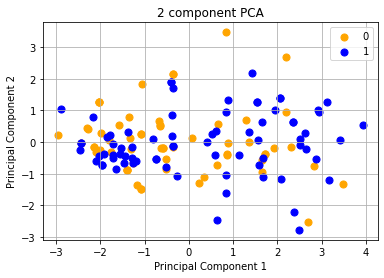

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 

targets = [0, 1]
colors = ['orange', 'blue']

for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1'], 
            x_pca.loc[indicesToKeep, 'PC2'],
            c = color, 
            s = 50)
    
ax.legend(targets)
ax.grid()

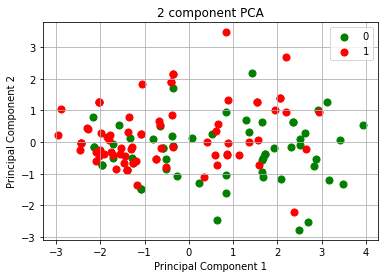

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 

targets = [0, 1]
colors = ['green', 'red']

for target, color in zip(targets, colors):
 indicesToKeep = df2['Sex_Woman'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1'], 
            x_pca.loc[indicesToKeep, 'PC2'],
            c = color, 
            s = 50)
    
ax.legend(targets)
ax.grid()


Text(0.5, 1.0, 'Testing scatter plot')

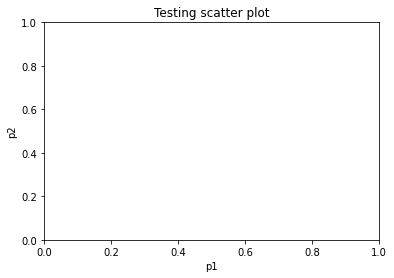

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('p1') 
ax.set_ylabel('p2') 
ax.set_title('Testing scatter plot') 